Churn Rate is a crucial KPI in any business. Hence it becomes extreamly important to track the churn rate, identitfy the reasons to take necessary steps to decrease the churn rate and retain the customers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"D:\Projects\Classification\Bank Customer Churn Prediction.csv")

In [3]:
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


10000 instances are present which represents 10000 customers with individual id. 12 attributes of the customers are available among these one is the churn status which is the target column

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


No null values to be dealt with

In [5]:
data.describe(include = 'all')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


### Numerical attribute analysis

The numerical attributes are credit_score , age , tenure , balance , estimated_salary, products_number

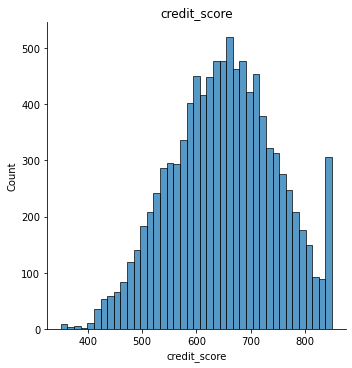

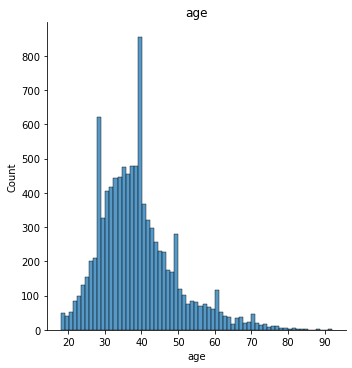

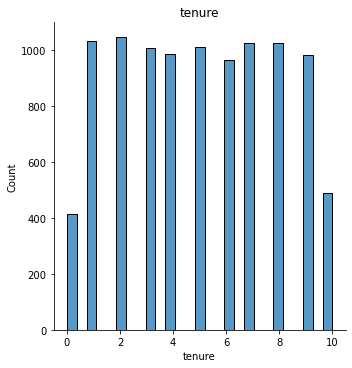

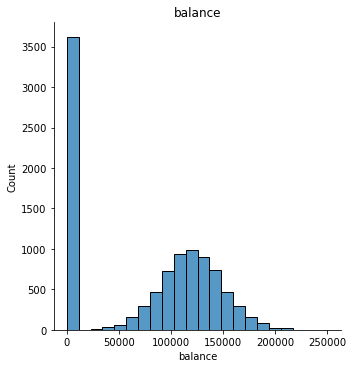

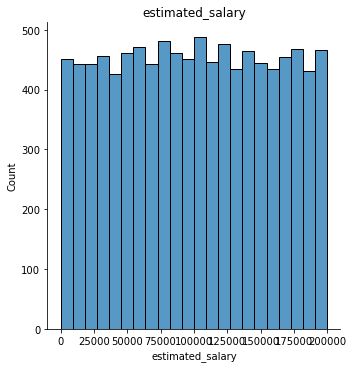

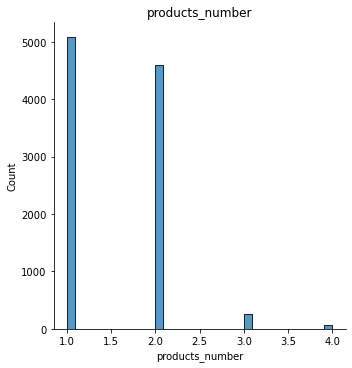

In [6]:
for i in ['credit_score','age','tenure','balance','estimated_salary','products_number']:
    sns.displot(data = data , x = data[i])
    plt.title(f'{i}')
    plt.show()

The credit score has a normal distribution. An outlier is present which is the max value and has a considerably high frequency as well

The age column is right skewed.

The tenure column has a rough uniform distribution

The balance column has its mode in 0 which is a potential outlier which makes the perfect normal distribution impossible for the balance column.

The estimated salary column also has a uniform distribution

The prodcuts_number is a discrete column with right skewed distribution.

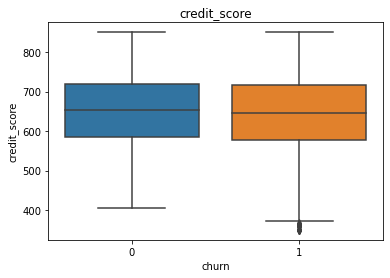

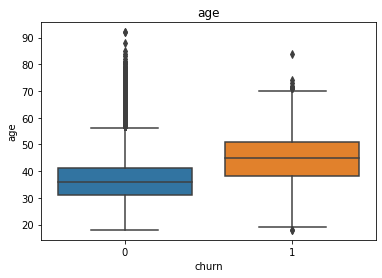

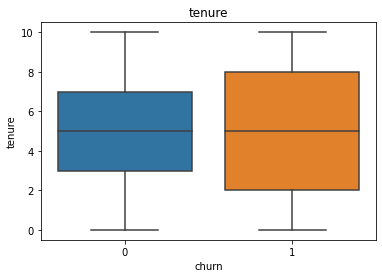

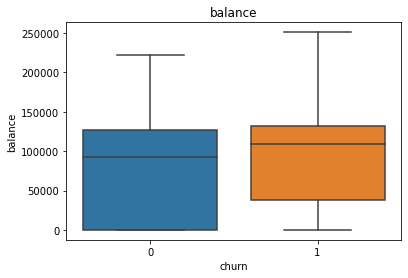

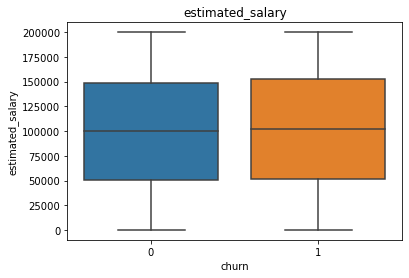

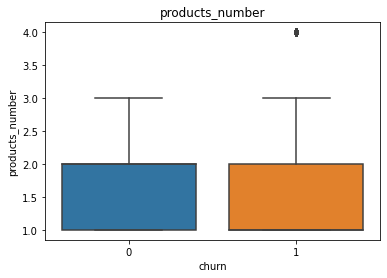

In [7]:
for i in ['credit_score','age','tenure','balance','estimated_salary','products_number']:
    sns.boxplot(data = data , y = data[i] , x = data['churn'] )
    plt.title(f'{i}')
    plt.show()

The credit score ,estimated salary and products number seems to create no big impact on the churn variable.

Balance ,tenure and age has little impacts on the target variable

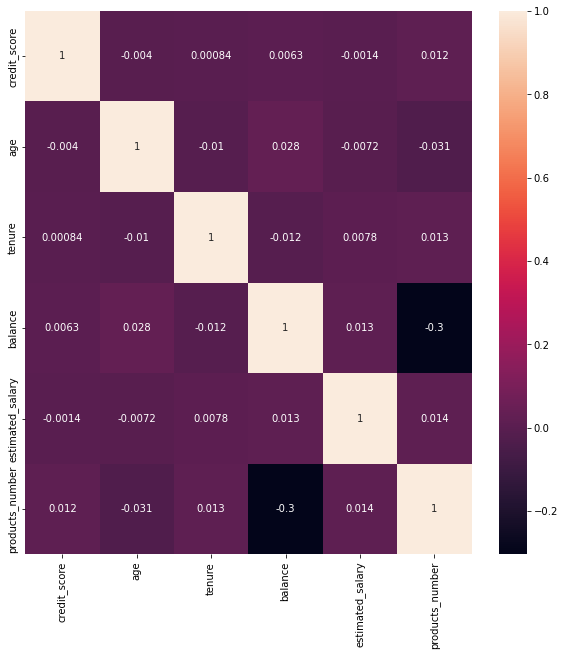

In [8]:
num = data[['credit_score','age','tenure','balance','estimated_salary','products_number']]
corr = num.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr,annot = True)
plt.show()

There are no noticeably high correlation among any of the categorical variables.

In [9]:
import scipy.stats as stats

In [10]:
for i in ['credit_score','age','tenure','balance','estimated_salary','products_number']:
    a = data[data['churn']==0][i]
    b = data[data['churn']==1][i]
    t,p = stats.ttest_ind(a,b)
    print(f'{i}'+'={:0.5f}'.format(p))

credit_score=0.00674
age=0.00000
tenure=0.16153
balance=0.00000
estimated_salary=0.22644
products_number=0.00000


## Categorical Variables

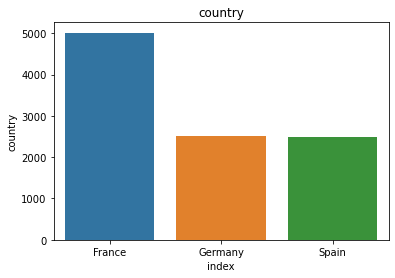

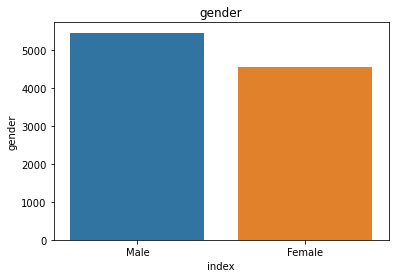

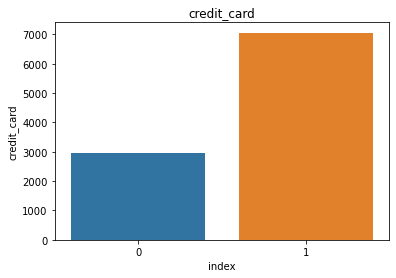

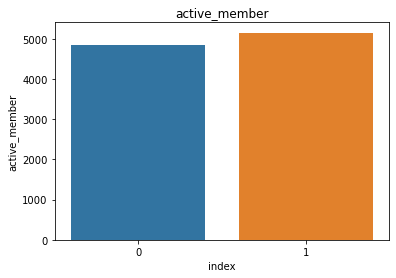

In [11]:
for i in ['country','gender','credit_card','active_member']:
    a = data[i].value_counts()
    a = a.reset_index()
    plt.title(f'{i}')
    sns.barplot(data = a,x='index',y = i)
    plt.show()

In [12]:
for i in ['country','gender','credit_card','active_member']:
    conti = pd.crosstab(data[i],data['churn'])
    c,p,df,ex = stats.chi2_contingency(conti)
    print(f'{i}'+'={:0.5f}'.format(p))

country=0.00000
gender=0.00000
credit_card=0.49237
active_member=0.00000


## Pre-Processing

In [13]:
data['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

There is a slight imbalance in the dataset.

In [14]:
## Encoding

data = pd.get_dummies(data,columns = ['country','gender','credit_card','active_member'])
data


,customer_id,credit_score,age,tenure,balance,products_number,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male,credit_card_0,credit_card_1,active_member_0,active_member_1
0,15634602,619,42,2,0.00,1,101348.88,1,1,0,0,1,0,0,1,0,1
1,15647311,608,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,1
2,15619304,502,42,8,159660.80,3,113931.57,1,1,0,0,1,0,0,1,1,0
3,15701354,699,39,1,0.00,2,93826.63,0,1,0,0,1,0,1,0,1,0
4,15737888,850,43,2,125510.82,1,79084.10,0,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,96270.64,0,1,0,0,0,1,0,1,1,0
9996,15569892,516,35,10,57369.61,1,101699.77,0,1,0,0,0,1,0,1,0,1
9997,15584532,709,36,7,0.00,1,42085.58,1,1,0,0,1,0,1,0,0,1
9998,15682355,772,42,3,75075.31,2,92888.52,1,0,1,0,0,1,0,1,1,0


In [15]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
data.drop('customer_id',axis = 1,inplace = True)
scaled = min_max.fit_transform(data)
scaled

array([[0.538     , 0.32432432, 0.2       , ..., 1.        , 0.        ,
        1.        ],
       [0.516     , 0.31081081, 0.1       , ..., 0.        , 0.        ,
        1.        ],
       [0.304     , 0.32432432, 0.8       , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.718     , 0.24324324, 0.7       , ..., 0.        , 0.        ,
        1.        ],
       [0.844     , 0.32432432, 0.3       , ..., 1.        , 1.        ,
        0.        ],
       [0.884     , 0.13513514, 0.4       , ..., 1.        , 1.        ,
        0.        ]])

## Raw model

In [16]:
x = data.drop('churn',axis = 1)
y = data[['churn']]

In [17]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as met
from sklearn.tree import DecisionTreeClassifier

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
acc = met.accuracy_score(y_pred,y_test)
print("Accuracy:",acc)


Accuracy: 0.787


We have received an accuracy of 79%. There is still room for improvement.

In [18]:
y_test['pred'] = y_pred
y_test

,churn,pred
5252,0,0
9150,0,0
7109,0,0
9577,1,0
1244,0,0
...,...,...
436,0,0
813,1,1
5998,0,0
6801,1,0


In [19]:
f1 = met.f1_score(y_pred,y_test['churn'])
f1

0.49406175771971494

The f1 score also tends to be low.

## Feature Selection

As the model with all the features included have not performed well, let us trying eliminating some non-important features

In [20]:
for i in ['credit_score','age','tenure','balance','estimated_salary','products_number']:
    a = data[data['churn']==0][i]
    b = data[data['churn']==1][i]
    t,p = stats.ttest_ind(a,b)
    print(f'{i}'+'={:0.5f}'.format(p))

credit_score=0.00674
age=0.00000
tenure=0.16153
balance=0.00000
estimated_salary=0.22644
products_number=0.00000


In the t-test , we can see that variables, tenue and estimated salary has higher p-value indictaing the insignificance in the target variable. And from the categorical columns credit card had highe p-value in chi-square test

In [21]:
x1 = data.drop(['churn','tenure','estimated_salary','credit_card_0','credit_card_1'],axis = 1)
y1 = data['churn']


In [22]:
scaled = min_max.fit_transform(x1)
dt1 = DecisionTreeClassifier()
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size =0.3)
dt1.fit(x1_train,y1_train)
y_pred1 = dt1.predict(x1_test)
acc1 = met.accuracy_score(y_pred1,y1_test)
f1_1 = met.f1_score(y_pred1,y1_test)
print("Accuracy:",acc1)
print("F1_score:",f1_1)

Accuracy: 0.792
F1_score: 0.49432739059967584


In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
smote = SMOTE(sampling_strategy='auto')

In [25]:
#REsampling on selected features
x2,y2 = smote.fit_resample(x1,y1)
scaled = min_max.fit_transform(x2)
dt2 = DecisionTreeClassifier()
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size =0.3)
dt2.fit(x2_train,y2_train)
y_pred2 = dt2.predict(x2_test)
acc2 = met.accuracy_score(y_pred2,y2_test)
f1_2 = met.f1_score(y_pred2,y2_test)
print("Accuracy:",acc2)
print("F1_score:",f1_2)

Accuracy: 0.8522394307241523
F1_score: 0.8502333474756045


So after Resampling there is a good improvement in both accuracy and f1 score

In [26]:
#resampling on all features
x3,y3 = smote.fit_resample(x,y)
scaled = min_max.fit_transform(x3)
dt3 = DecisionTreeClassifier()
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,test_size =0.3)
dt3.fit(x3_train,y3_train)
y_pred3 = dt3.predict(x3_test)
acc3 = met.accuracy_score(y_pred3,y3_test)
f1_3 = met.f1_score(y_pred3,y3_test)
print("Accuracy:",acc3)
print("F1_score:",f1_3)

Accuracy: 0.8327752197572206
F1_score: 0.8337148803329865


The accuracy and f1 score seems to be lesser than for that of selected features.

In [27]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x2,y2)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


In [28]:
dt_hype = DecisionTreeClassifier(criterion = 'gini',max_depth = 10,min_samples_leaf = 4,min_samples_split = 5,max_features = None)
dt_hype.fit(x2_train,y2_train)
y_pred2 = dt_hype.predict(x2_test)
acc2 = met.accuracy_score(y_pred2,y2_test)
f1_2 = met.f1_score(y_pred2,y2_test)
print("Accuracy:",acc2)
print("F1_score:",f1_2)


Accuracy: 0.8740058601925492
F1_score: 0.8687881429816914


The accuracy  and f1 score has been further increased to around 86%

## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier()
rf.fit(x2_train,y2_train)
y_pred_rf = rf.predict(x2_test)
acc = met.accuracy_score(y_pred_rf,y2_test)
f1 = met.f1_score(y_pred_rf,y2_test)
print("ACCURACY:",acc)
print("F1-SCORE:",f1)

ACCURACY: 0.8987023859355379
F1-SCORE: 0.8945074106364429


Random Forest is also a tree based ensemble technique which builds multiple decision trees and combine the result of all of them. The plain Random Forest model gives a better accuracy and F1 score

In [31]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(x2_train, y2_train)

best_params = grid_search.best_params_


In [32]:
rf_new = RandomForestClassifier(min_samples_leaf = 2,min_samples_split = 2,max_depth = None,n_estimators = 100)
rf_new.fit(x2_train,y2_train)
y_pred_rf = rf_new.predict(x2_test)
acc = met.accuracy_score(y_pred_rf,y2_test)
f1 = met.f1_score(y_pred_rf,y2_test)
print("ACCURACY:",acc)
print("F1-SCORE:",f1)

ACCURACY: 0.9007953118459606
F1-SCORE: 0.8963254593175853


## K - Nearest Neighbours

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k_values = list(range(1, 21))  

cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  
    scores = cross_val_score(knn, x2_train, y2_train, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the K value with the highest cross-validation score
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print("Optimal K:", optimal_k)


In [35]:
cv_scores

The cv score is highest for k = 1.The second highest is for K=3. Let us build model with both 

In [36]:
## k = 1
knn_1 = KNeighborsClassifier(n_neighbors=1)  
knn_1.fit(x2_train,y2_train)
y_pred = knn_1.predict(x2_test)
acc = met.accuracy_score(y_pred,y2_test)
f1 = met.f1_score(y_pred,y2_test)
print("ACCURACY:",acc)
print("F1-SCORE:",f1)

ACCURACY: 0.747802427794056
F1-SCORE: 0.7601990049751243


In [37]:
## k = 3

knn_3 = KNeighborsClassifier(n_neighbors=3)  
knn_3.fit(x2_train,y2_train)
y_pred = knn_3.predict(x2_test)
acc = met.accuracy_score(y_pred,y2_test)
f1 = met.f1_score(y_pred,y2_test)
print("ACCURACY:",acc)
print("F1-SCORE:",f1)

ACCURACY: 0.723524487233152
F1-SCORE: 0.7424449210372392


KNN has not produced a desirable score for accuracy and F1 score.

Among all the models built , Random Forest provides the highest accuracy